In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [39]:
data = 'dev_in.csv'

df = pd.read_csv(data, header=None, sep=',')

In [40]:
header_row = 0
df.columns = df.iloc[header_row]
df = df.tail(-1)

In [41]:
col_list = list(df.columns)
x, y = col_list.index('climate'), col_list.index('gfs_total_clouds_cover_low_next')
col_list[y], col_list[x] = col_list[x], col_list[y]
df = df[col_list]

In [42]:
df.head()

,fact_time,fact_latitude,fact_longitude,fact_temperature,fact_cwsm_class,gfs_total_clouds_cover_low_next,topography_bathymetry,sun_elevation,climate_temperature,climate_pressure,...,cmc_0_1_66_0_grad,cmc_0_1_66_0_next,cmc_0_1_67_0_grad,cmc_0_1_67_0_next,cmc_0_1_68_0_grad,cmc_0_1_68_0_next,gfs_2m_dewpoint_grad,gfs_2m_dewpoint_next,gfs_total_clouds_cover_low_grad,climate
1,1539162000,-40.35,-9.88,11.0,10,2.0,-843.0,31.78248998153052,10.07071428571432,765.6312283014016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.505035400390625,2.6475769042968977,2.0,tropical
2,1545006600,53.421299,-6.270070000000004,4.0,10,0.0,67.0,-59.69152145231892,7.005000000000032,752.8976150963312,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.4000244140625,1.2499938964843975,0.0,mild temperate
3,1540094400,-19.7577,63.361,26.0,10,1.0,6.0,35.250889085578635,23.32714285714289,763.1150163007375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.100006103515625,21.05001220703128,-1.0,dry
4,1552611600,35.245899,47.009201,5.0,10,81.0,1390.0,-23.755614985282445,3.1092857142857446,609.4193331163475,...,1.69672,5.1653,0.0,4.8750000000000006e-05,0.0,0.0,-1.5,-0.3499816894531022,-12.0,mild temperate
5,1545631200,26.633333,118.15,14.0,20,83.0,210.0,33.04043798862271,12.172142857142884,734.6780370001287,...,0.0,0.0,0.0,0.0,0.0,0.0,0.102081298828125,11.513879394531273,-15.0,mild temperate


In [43]:
# display categorical variables

categorical = [col for col in df.columns if df[col].dtypes == 'O']

In [44]:
# print percentage of missing values in the categorical variables in data

df[categorical].isnull().mean()

0
fact_time                          0.00000
fact_latitude                      0.00000
fact_longitude                     0.00000
fact_temperature                   0.00000
fact_cwsm_class                    0.00000
                                    ...   
cmc_0_1_68_0_next                  0.00062
gfs_2m_dewpoint_grad               0.00014
gfs_2m_dewpoint_next               0.00008
gfs_total_clouds_cover_low_grad    0.00014
climate                            0.00000
Length: 129, dtype: float64

In [45]:
# print categorical variables with missing data

for col in categorical:
    if df[col].isnull().mean()>0:
        print(col, (df[col].isnull().mean()))

gfs_total_clouds_cover_low_next 8e-05
cmc_0_0_0_1000 0.00062
cmc_0_0_0_2_grad 0.00062
cmc_0_0_0_2_interpolated 0.00062
cmc_0_0_0_2_next 0.00062
cmc_0_0_0_2 0.00062
cmc_0_0_0_500 0.00062
cmc_0_0_0_700 0.00062
cmc_0_0_0_850 0.00062
cmc_0_0_0_925 0.00062
cmc_0_0_6_2 0.00062
cmc_0_0_7_1000 0.00062
cmc_0_0_7_2 0.00062
cmc_0_0_7_500 0.00062
cmc_0_0_7_700 0.00062
cmc_0_0_7_850 0.00062
cmc_0_0_7_925 0.00062
cmc_0_1_0_0 0.00062
cmc_0_1_11_0 0.00062
cmc_0_1_65_0 0.00062
cmc_0_1_66_0 0.00062
cmc_0_1_67_0 0.00062
cmc_0_1_68_0 0.00062
cmc_0_1_7_0 0.00062
cmc_0_2_2_10 0.00062
cmc_0_2_2_1000 0.00062
cmc_0_2_2_500 0.00062
cmc_0_2_2_700 0.00062
cmc_0_2_2_850 0.00062
cmc_0_2_2_925 0.00062
cmc_0_2_3_10 0.00062
cmc_0_2_3_1000 0.00062
cmc_0_2_3_500 0.00062
cmc_0_2_3_700 0.00062
cmc_0_2_3_850 0.00062
cmc_0_2_3_925 0.00062
cmc_0_3_0_0 0.00062
cmc_0_3_0_0_next 0.00062
cmc_0_3_1_0 0.00062
cmc_0_3_5_1000 0.00062
cmc_0_3_5_500 0.00062
cmc_0_3_5_700 0.00062
cmc_0_3_5_850 0.00062
cmc_0_3_5_925 0.00062
cmc_0_6_1_0 

In [46]:
# impute missing categorical variables with most frequent value

for col in categorical:
    if df[col].isnull().mean()>0:
        df[col].fillna(df[col].mode()[0], inplace=True) 

In [47]:
df.head()

,fact_time,fact_latitude,fact_longitude,fact_temperature,fact_cwsm_class,gfs_total_clouds_cover_low_next,topography_bathymetry,sun_elevation,climate_temperature,climate_pressure,...,cmc_0_1_66_0_grad,cmc_0_1_66_0_next,cmc_0_1_67_0_grad,cmc_0_1_67_0_next,cmc_0_1_68_0_grad,cmc_0_1_68_0_next,gfs_2m_dewpoint_grad,gfs_2m_dewpoint_next,gfs_total_clouds_cover_low_grad,climate
1,1539162000,-40.35,-9.88,11.0,10,2.0,-843.0,31.78248998153052,10.07071428571432,765.6312283014016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.505035400390625,2.6475769042968977,2.0,tropical
2,1545006600,53.421299,-6.270070000000004,4.0,10,0.0,67.0,-59.69152145231892,7.005000000000032,752.8976150963312,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.4000244140625,1.2499938964843975,0.0,mild temperate
3,1540094400,-19.7577,63.361,26.0,10,1.0,6.0,35.250889085578635,23.32714285714289,763.1150163007375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.100006103515625,21.05001220703128,-1.0,dry
4,1552611600,35.245899,47.009201,5.0,10,81.0,1390.0,-23.755614985282445,3.1092857142857446,609.4193331163475,...,1.69672,5.1653,0.0,4.8750000000000006e-05,0.0,0.0,-1.5,-0.3499816894531022,-12.0,mild temperate
5,1545631200,26.633333,118.15,14.0,20,83.0,210.0,33.04043798862271,12.172142857142884,734.6780370001287,...,0.0,0.0,0.0,0.0,0.0,0.0,0.102081298828125,11.513879394531273,-15.0,mild temperate


In [48]:
from sklearn.preprocessing import StandardScaler
features = df.columns[:128]
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['climate']].values
# Standardizing the features
z = StandardScaler().fit_transform(x)
print(z)

[[-1.11199218e+00 -3.02933899e+00  1.21828898e-01 ...  3.34224642e-01
  -5.29164272e-01  1.13339810e-01]
 [-4.33027006e-02  1.17273658e+00  1.68343655e-01 ... -2.77716735e-01
  -6.68758896e-01  1.70576815e-03]
 [-9.41502147e-01 -2.10655769e+00  1.06555559e+00 ...  6.03707137e-02
   1.30892407e+00 -5.41112525e-02]
 ...
 [ 1.53482725e+00  4.67741406e-01 -1.31567247e+00 ... -1.69613647e+00
  -3.69110239e-01 -1.78443889e+00]
 [ 6.65975352e-01 -5.81851556e-06  2.81502852e-01 ... -1.66210810e-01
  -1.38143341e+00  1.70576815e-03]
 [-5.15309843e-02 -1.37511271e+00 -7.81396930e-01 ... -3.45313591e-01
   9.69322870e-01 -5.41112525e-02]]


In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(z)
principalDf = pd.DataFrame(data = principalComponents
 , columns = ['principal component 1', 'principal component 2'])

In [50]:
print(principalDf)

       principal component 1  principal component 2
0                   5.176758               2.385767
1                   9.088324               3.095387
2                  -5.393927               1.805214
3                   6.047748               2.343956
4                  -1.332808               2.250926
...                      ...                    ...
49995              11.649454               4.350942
49996              -5.185409              -3.579168
49997               4.297280               4.069448
49998               0.363631              -4.430714
49999              -7.010120               0.873511

[50000 rows x 2 columns]


In [51]:
principalDf.shape

(50000, 2)

In [52]:
df[['climate']].shape

(50000, 1)

In [53]:
df.index = df.index-1

In [54]:
finalDf = pd.concat([principalDf, df[['climate']]], axis = 1)
print(finalDf)

       principal component 1  principal component 2         climate
0                   5.176758               2.385767        tropical
1                   9.088324               3.095387  mild temperate
2                  -5.393927               1.805214             dry
3                   6.047748               2.343956  mild temperate
4                  -1.332808               2.250926  mild temperate
...                      ...                    ...             ...
49995              11.649454               4.350942  mild temperate
49996              -5.185409              -3.579168  mild temperate
49997               4.297280               4.069448  mild temperate
49998               0.363631              -4.430714             dry
49999              -7.010120               0.873511             dry

[50000 rows x 3 columns]


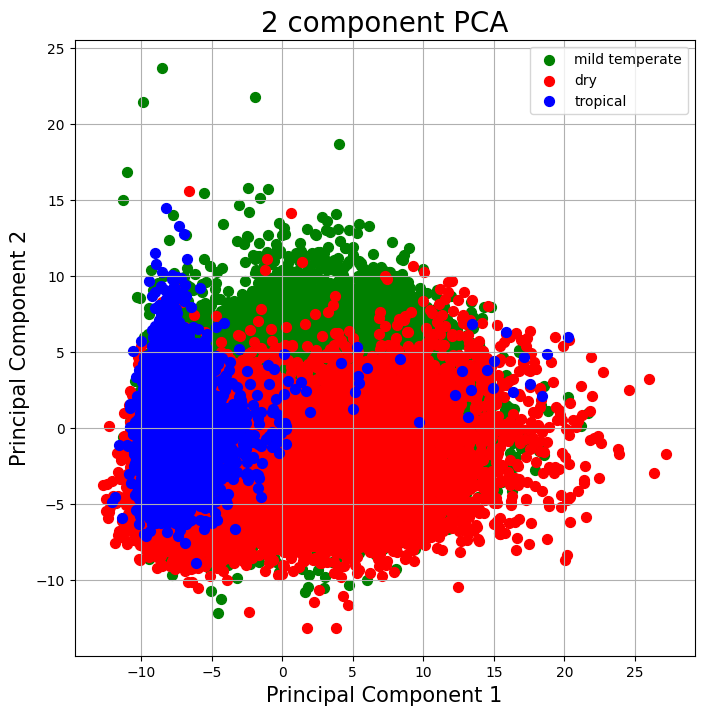

In [55]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['mild temperate', 'dry', 'tropical']
colors = ['g', 'r', 'b']
for target, color in zip(targets,colors):
 indicesToKeep = finalDf['climate'] == target
 ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
 , finalDf.loc[indicesToKeep, 'principal component 2']
 , c = color
 , s = 50)
ax.legend(targets)
ax.grid()

In [56]:
pca.explained_variance_ratio_

array([0.29115048, 0.08187584])

Again inplementing Naive Bayes

In [57]:
# x is features y is result
X = finalDf.drop(['climate'], axis=1)

y = finalDf['climate']

In [58]:
# split X and y into training and testing sets
# here we hav put 70% train data and 30% test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [59]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((35000, 2), (15000, 2))

In [60]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [61]:
y_pred = gnb.predict(X_test)

y_pred

array(['dry', 'mild temperate', 'mild temperate', ..., 'mild temperate',
       'mild temperate', 'mild temperate'], dtype='<U14')

In [62]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7221


In [63]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array(['mild temperate', 'mild temperate', 'mild temperate', ...,
       'tropical', 'tropical', 'mild temperate'], dtype='<U14')

In [64]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7186


In [65]:
# print the scores on training and test set

print('Training set accuracy: {:.4f}'.format(gnb.score(X_train, y_train)*100))

print('Test set accuracy: {:.4f}'.format(gnb.score(X_test, y_test)*100))


Training set accuracy: 71.8600
Test set accuracy: 72.2067


Implementing K means

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

In [67]:
def cluster_1_label(alpha):
    if alpha == 0:
        return 'mild temperate'
    if alpha == 1:
        return 'dry'
    if alpha == 2:
        return 'tropical'

kmeans_model_1 = KMeans(n_clusters=3,random_state=123)
distances_1 = kmeans_model_1.fit_transform(finalDf.iloc[:,0:2])
labels_1 = kmeans_model_1.labels_
print (labels_1)
finalDf['cluster_1']=labels_1
finalDf['cluster_1_label']=finalDf['cluster_1'].apply(cluster_1_label)

[1 1 2 ... 1 0 2]


In [68]:
# true results / total results for accuracy
cluster_1_accuracy = len(finalDf[finalDf['climate']==finalDf['cluster_1_label']])/len(finalDf)
print('K=3 KMeans -> {0:.4f}%'.format(cluster_1_accuracy*100))

K=3 KMeans -> 43.8600%


In [69]:
# identifying actual result to cluster mapping -> 
# not satisfactory as the error values are near to correct once
pd.crosstab(finalDf['climate'],labels_1)

col_0,0,1,2
climate,,,
dry,4468,2496,3997
mild temperate,12877,11357,8164
tropical,60,24,6557


Implementing logistic regression

In [70]:
# trying losgistic classification to check accuracy and for that 
# computing the actual_climate to determine through logistic classification
dummies = pd.get_dummies(finalDf['climate'],prefix='actual_climate')
finalDf = pd.concat([finalDf,dummies],axis=1)
finalDf.head()

,principal component 1,principal component 2,climate,cluster_1,cluster_1_label,actual_climate_dry,actual_climate_mild temperate,actual_climate_tropical
0,5.176758,2.385767,tropical,1,dry,0,0,1
1,9.088324,3.095387,mild temperate,1,dry,0,1,0
2,-5.393927,1.805214,dry,2,tropical,1,0,0
3,6.047748,2.343956,mild temperate,1,dry,0,1,0
4,-1.332808,2.250926,mild temperate,0,mild temperate,0,1,0


In [71]:
# dividing in 3 models as per the algorithm
classifiers = ['mild temperate','dry','tropical']
models = {}
for mdl_idx in classifiers:
    lgr_model = LogisticRegression()
    lgr_model.fit(finalDf.iloc[:,0:2],finalDf['actual_climate_{}'.format(mdl_idx)])
    models[mdl_idx]=lgr_model
models

{'mild temperate': LogisticRegression(),
 'dry': LogisticRegression(),
 'tropical': LogisticRegression()}

In [72]:
# printing probablity of the data to be in the class
lgr_probabilities = pd.DataFrame(columns=classifiers)
for mdl_key, mdl_model in models.items():
    lgr_probabilities[mdl_key] = mdl_model.predict_proba(finalDf.iloc[:,0:2])[:,1]
lgr_probabilities.head()

,mild temperate,dry,tropical
0,0.871512,0.095650,0.000278
1,0.930596,0.078460,0.000024
2,0.575175,0.111705,0.201326
3,0.884088,0.096819,0.000156
4,0.723207,0.098968,0.018774


In [73]:
predicted_climate = lgr_probabilities.idxmax(axis=1)
pred_spec = lgr_probabilities.max(axis=1)
pd.crosstab(finalDf['climate'],predicted_climate)

col_0,dry,mild temperate,tropical
climate,,,
dry,2298,7808,855
mild temperate,1131,29872,1395
tropical,272,2191,4178


In [74]:
predicted_climate.sort_index(inplace=True)
lgr_accuracy = len(finalDf[finalDf['climate']==predicted_climate].sort_index().sort_index(axis=0))/len(finalDf)
print('Logistic Regression Accuracy - {0:.4f}%'.format(lgr_accuracy*100));

Logistic Regression Accuracy - 72.6960%
